In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


In [2]:
# Load dataset
#df = pd.read_csv('../input/ucidata/crx.data',header=None)
header_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
df = pd.read_csv('../Data/crx.data',names=header_names)

# Inspect data
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
df = df.replace('?',np.nan)

In [4]:
def fix_missing_mean(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mean 
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mean(), inplace = True)    

def fix_missing_mode(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mode 
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mode(), inplace = True)    

    
def fix_missing_ffill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the previous row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='ffill')  
    
def fix_missing_bfill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the next row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='bfill') 

In [5]:
fix_missing_ffill(df,'A')
fix_missing_ffill(df,'B')
fix_missing_ffill(df,'D')
fix_missing_ffill(df,'E')
fix_missing_ffill(df,'F')
fix_missing_ffill(df,'G')
fix_missing_mean(df,'N')

In [6]:
# Separate target from features
y = df['P']
features = df
features = features.drop(['P'], axis=1)
# Preview features
features.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


In [7]:
# List of categorical columns
object_cols = ['A','B','D','E','F','G','I','J','L','M','N']

# ordinal-encode categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])

# Preview the ordinal-encoded features
X.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1.0,156.0,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,69.0,0
1,0.0,328.0,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560
2,0.0,89.0,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,97.0,824
3,1.0,125.0,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3
4,1.0,43.0,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0


In [8]:
X_norm=(X-X.mean())/X.std()

# X_norm=(X-X.min())/(X.max()-X.min())

**Part 1**

Text(0.5, 1.0, 'Within Cluster Sum of Squares vs Number of Clusters')

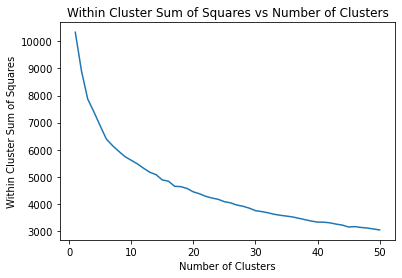

In [9]:
wcss = [] 
for number_of_clusters in range(1, 51): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(X_norm) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 51), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Within Cluster Sum of Squares vs Number of Clusters')

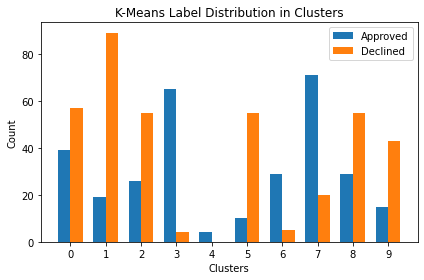

In [10]:
cluster = 10
kmeans = KMeans(n_clusters = cluster, random_state = 42)
kmeans.fit(X_norm) 
lab = kmeans.labels_

bar1 = [0]*cluster
bar2 = [0]*cluster

for i in range(len(lab)):
    if y[i] == "+":
        bar1[lab[i]] += 1
    else:
        bar2[lab[i]] += 1

# labels = ['1', '2', '3', '4', '5', '6']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(cluster)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bar1, width, label='Approved')
rects2 = ax.bar(x + width/2, bar2, width, label='Declined')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Clusters')
ax.set_title('K-Means Label Distribution in Clusters')
ax.set_xticks(x)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

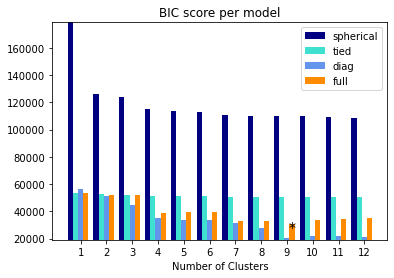

In [11]:
# General EM for GMM
from sklearn import preprocessing
import itertools

# transform data such that the distribution mean = 0 and std = 1
# scaler = preprocessing.StandardScaler()
# scaler.fit(X)
# scaled_X = scaler.transform(X)

# xs = pd.DataFrame(scaled_X, columns = X.columns)

from sklearn.mixture import GaussianMixture

lowest_bic = np.infty
bic = []
n_components_range = range(1, 13)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type, random_state=0
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf_gmm = best_gmm
bars = []

# Plot the BIC scores
plt.figure()
spl = plt.subplot()
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of Clusters")
spl.legend([b[0] for b in bars], cv_types)

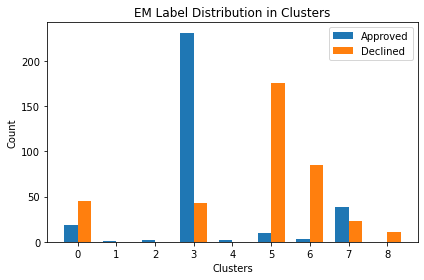

In [12]:
lab = clf_gmm.fit_predict(X)

bar1 = [0]*9
bar2 = [0]*9

for i in range(len(lab)):
    if y[i] == "+":
        bar1[lab[i]] += 1
    else:
        bar2[lab[i]] += 1

labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bar1, width, label='Approved')
rects2 = ax.bar(x + width/2, bar2, width, label='Declined')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Clusters')
ax.set_title('EM Label Distribution in Clusters')
ax.set_xticks(x)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**Dimension Reduction**

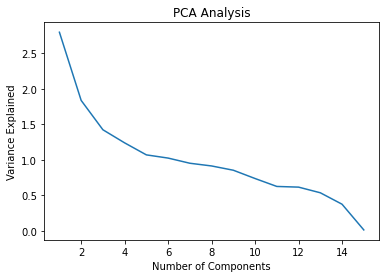

In [13]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD

pca = PCA(n_components=15, random_state=0)
pca.fit(X_norm)
# variance = pca.explained_variance_ratio_ #calculate variance ratios
# var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var=np.cumsum(pca.explained_variance_)
# print(var) #cumulative sum of variance explained with [n] features
plt.ylabel('Variance Explained')
plt.xlabel('Number of Components')
plt.title('PCA Analysis')
# plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(range(1, 16), pca.explained_variance_)

pca = PCA(n_components=11, random_state=0)
X_pca = pca.fit_transform(X_norm)

/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


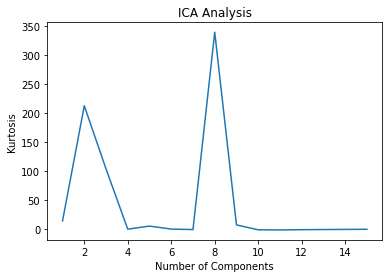

In [14]:
from scipy.stats import kurtosis

ica = FastICA(n_components=15, random_state=10)
X_ica = ica.fit_transform(X_norm)

plt.plot(range(1, 16), kurtosis(X_ica))
plt.ylabel('Kurtosis')
plt.xlabel('Number of Components')
plt.title('ICA Analysis')

ica = FastICA(n_components=8, random_state=0)
X_ica = ica.fit_transform(X_norm)

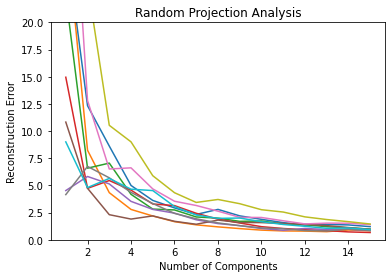

In [15]:
for s in range(10):
    error = []

    for i in range(1, 16):
        grp = GaussianRandomProjection(n_components=i, random_state=s, compute_inverse_components=True)
        X_grp = grp.fit_transform(X_norm)
        m = grp.inverse_components_
        inv = np.linalg.pinv(m)
        X_inv = np.matmul(X_grp, inv)
        mse = ((np.array(X_norm)-X_inv)**2).mean()
        error.append(mse)

    plt.plot(range(1, 16), error)
    
    
plt.ylabel('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylim(0, 20)
plt.title('Random Projection Analysis')

grp = GaussianRandomProjection(n_components=7, random_state=0)
X_grp = grp.fit_transform(X_norm)

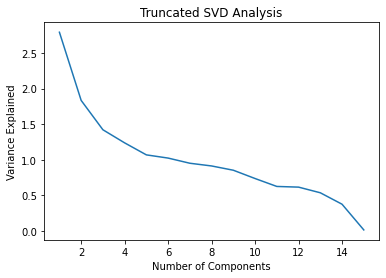

In [16]:
svd = TruncatedSVD(n_components=15, n_iter=7, random_state=0)
X_svd = svd.fit_transform(X_norm)
plt.ylabel('Variance Explained')
plt.xlabel('Number of Components')
# plt.yscale('log')
plt.title('Truncated SVD Analysis')
# plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(range(1, 16), svd.explained_variance_)

svd = TruncatedSVD(n_components=11, n_iter=7, random_state=0)
X_svd = svd.fit_transform(X_norm)

**Part 3 K Means**

Text(0.5, 1.0, 'Within Cluster Sum of Squares vs Number of Clusters')

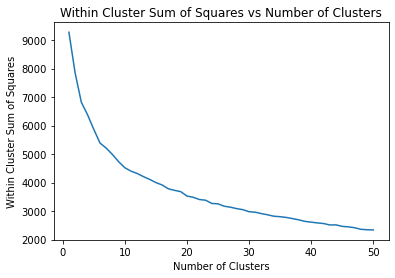

In [32]:
# use the following lines to select which data to perform clustering on.

X_p3 = X_pca
# X_p3 = X_ica
# X_p3 = X_grp
# X_p3 = X_svd

wcss = [] 
for number_of_clusters in range(1, 51): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(X_p3) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 51), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Within Cluster Sum of Squares vs Number of Clusters')

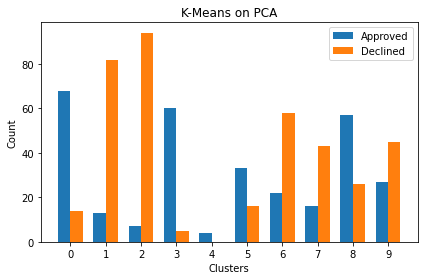

In [33]:
cluster1 = 10

kmeans = KMeans(n_clusters = cluster1, random_state = 42)
kmeans.fit(X_p3) 
lab = kmeans.labels_

bar1 = [0]*cluster1
bar2 = [0]*cluster1

for i in range(len(lab)):
    if y[i] == "+":
        bar1[lab[i]] += 1
    else:
        bar2[lab[i]] += 1

# labels = ['1', '2', '3', '4', '5', '6']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(cluster1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bar1, width, label='Approved')
rects2 = ax.bar(x + width/2, bar2, width, label='Declined')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Clusters')
ax.set_title('K-Means on PCA')
ax.set_xticks(x)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**Part 3 EM**

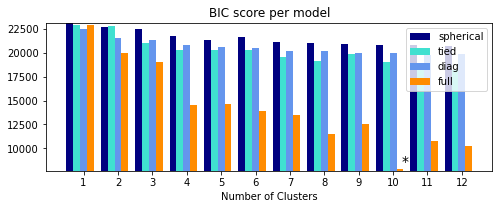

In [19]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 13)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type, random_state=0
        )
        gmm.fit(X_p3)
        bic.append(gmm.bic(X_p3))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf_gmm = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of Clusters")
spl.legend([b[0] for b in bars], cv_types)

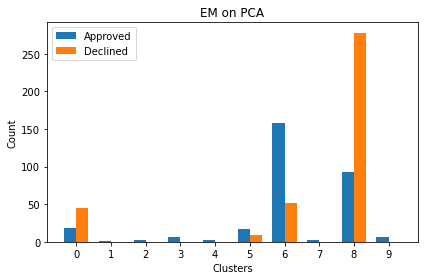

In [20]:
lab = clf_gmm.fit_predict(X)
cluster2 = 10

bar1 = [0]*cluster2
bar2 = [0]*cluster2

for i in range(len(lab)):
    if y[i] == "+":
        bar1[lab[i]] += 1
    else:
        bar2[lab[i]] += 1

# labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(cluster2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bar1, width, label='Approved')
rects2 = ax.bar(x + width/2, bar2, width, label='Declined')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Clusters')
ax.set_title('EM on PCA')
ax.set_xticks(x)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**Part 4**

0.8768115942028986
0.8333333333333334
0.8260869565217391
0.8043478260869565
0.8333333333333334
0.4071650505065918 0.35418009757995605 0.1131279468536377 0.3049788475036621 0.3156552314758301


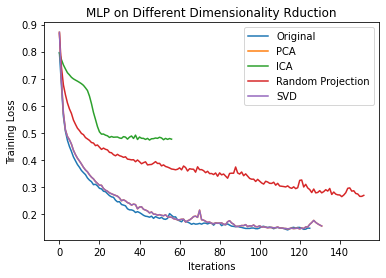

In [21]:
from sklearn.neural_network import MLPClassifier
from time import time

t0 = time()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y,test_size=0.20,random_state=2)
mlp_clf0 = MLPClassifier(hidden_layer_sizes=(20,50, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf0.fit(X_train, y_train)
print(mlp_clf0.score(X_test, y_test))

t1 = time()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y,test_size=0.20,random_state=2)
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf1.fit(X_train, y_train)
print(mlp_clf1.score(X_test, y_test))

t2 = time()
X_train, X_test, y_train, y_test = train_test_split(X_ica, y,test_size=0.20,random_state=2)
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf2.fit(X_train, y_train)
print(mlp_clf2.score(X_test, y_test))

t3 = time()
X_train, X_test, y_train, y_test = train_test_split(X_grp, y,test_size=0.20,random_state=2)
mlp_clf3 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf3.fit(X_train, y_train)
print(mlp_clf3.score(X_test, y_test))

t4 = time()
X_train, X_test, y_train, y_test = train_test_split(X_svd, y,test_size=0.20,random_state=2)
mlp_clf4 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf4.fit(X_train, y_train)
print(mlp_clf4.score(X_test, y_test))

t5 = time()
print(t5-t4, t4-t3, t3-t2, t2-t1, t1-t0)

plt.plot(mlp_clf0.loss_curve_, label = f'Original')
plt.plot(mlp_clf1.loss_curve_, label = f'PCA')
plt.plot(mlp_clf2.loss_curve_, label = f'ICA')
plt.plot(mlp_clf3.loss_curve_, label = f'Random Projection')
plt.plot(mlp_clf4.loss_curve_, label = f'SVD')
plt.xlabel('Iterations')
plt.ylabel("Training Loss")
plt.title("MLP on Different Dimensionality Rduction")
plt.legend()

**Part 5**

0.8768115942028986
0.8405797101449275


/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.

0.8260869565217391


/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.782608695652174
0.8623188405797102
0.37030506134033203 0.28405094146728516 0.24201488494873047 0.19647908210754395 0.34303998947143555


/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


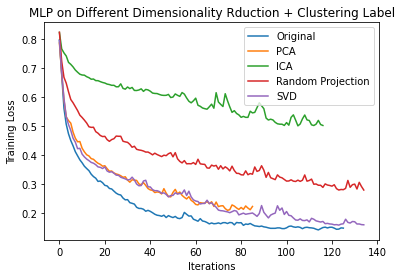

In [25]:
#pca 
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(X_pca) 
pca_label1 = kmeans.labels_

gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
pca_label2 = gmm.fit_predict(X_pca)
X_pca_cls = pd.DataFrame(X_pca)
X_pca_cls['kmeans'] = pca_label1
X_pca_cls['gmm'] = pca_label2

#ica
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(X_ica) 
ica_label1 = kmeans.labels_

gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
ica_label2 = gmm.fit_predict(X_ica)
X_ica_cls = pd.DataFrame(X_ica)
X_ica_cls['kmeans'] = ica_label1
X_ica_cls['gmm'] = ica_label2

#grp
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(X_grp) 
grp_label1 = kmeans.labels_

gmm = GaussianMixture(n_components=10, covariance_type='tied', random_state=0)
grp_label2 = gmm.fit_predict(X_grp)
X_grp_cls = pd.DataFrame(X_grp)
X_grp_cls['kmeans'] = grp_label1
X_grp_cls['gmm'] = grp_label2

#svd
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(X_svd) 
svd_label1 = kmeans.labels_

gmm = GaussianMixture(n_components=9, covariance_type='full', random_state=0)
svd_label2 = gmm.fit_predict(X_svd)
X_svd_cls = pd.DataFrame(X_svd)
X_svd_cls['kmeans'] = svd_label1
X_svd_cls['gmm'] = svd_label2


t0 = time()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y,test_size=0.20,random_state=2)
mlp_clf0 = MLPClassifier(hidden_layer_sizes=(20,50, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf0.fit(X_train, y_train)
print(mlp_clf0.score(X_test, y_test))

t1 = time()
X_train, X_test, y_train, y_test = train_test_split(X_pca_cls, y,test_size=0.20,random_state=2)
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf1.fit(X_train, y_train)
print(mlp_clf1.score(X_test, y_test))

t2 = time()
X_train, X_test, y_train, y_test = train_test_split(X_ica_cls, y,test_size=0.20,random_state=2)
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf2.fit(X_train, y_train)
print(mlp_clf2.score(X_test, y_test))

t3 = time()
X_train, X_test, y_train, y_test = train_test_split(X_grp_cls, y,test_size=0.20,random_state=2)
mlp_clf3 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf3.fit(X_train, y_train)
print(mlp_clf3.score(X_test, y_test))

t4 = time()
X_train, X_test, y_train, y_test = train_test_split(X_svd_cls, y,test_size=0.20,random_state=2)
mlp_clf4 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf4.fit(X_train, y_train)
print(mlp_clf4.score(X_test, y_test))

t5 = time()
print(t5-t4, t4-t3, t3-t2, t2-t1, t1-t0)

plt.plot(mlp_clf0.loss_curve_, label = f'Original')
plt.plot(mlp_clf1.loss_curve_, label = f'PCA')
plt.plot(mlp_clf2.loss_curve_, label = f'ICA')
plt.plot(mlp_clf3.loss_curve_, label = f'Random Projection')
plt.plot(mlp_clf4.loss_curve_, label = f'SVD')
plt.title("MLP on Different Dimensionality Rduction + Clustering Label")
plt.xlabel('Iterations')
plt.ylabel("Training Loss")
plt.legend()